In [2]:
# Creating Dataset

In [4]:
import pandas as pd

# Create a simple, manually-defined dataset
data = {
    "Area_sqft": [750, 800, 1200, 1500, 1800, 2100, 2400, 2750, 3000, 3300],
    "Bedrooms": [1, 2, 2, 3, 3, 4, 4, 4, 5, 5],
    "Price": [150000, 165000, 240000, 300000, 330000, 360000, 390000, 430000, 470000, 500000],
}

# Create binary label: 1 if price > 300000, else 0
data["Expensive"] = [1 if price > 300000 else 0 for price in data["Price"]]

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("house_data.csv", index=False)
print("Dataset saved as 'house_data.csv'")

Dataset saved as 'house_data.csv'


In [6]:
# Code for all exps

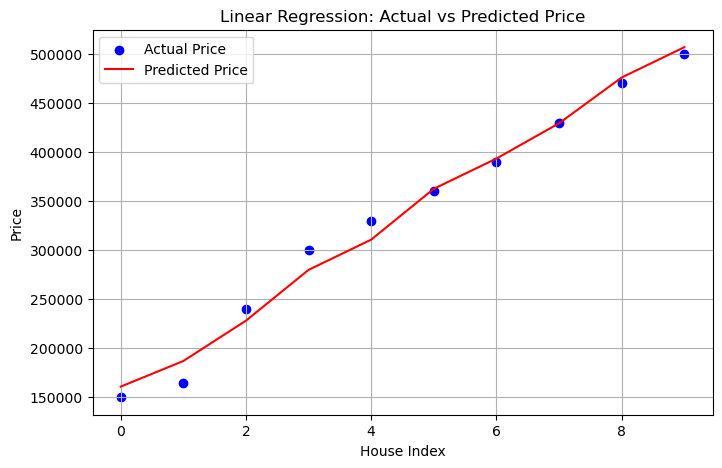

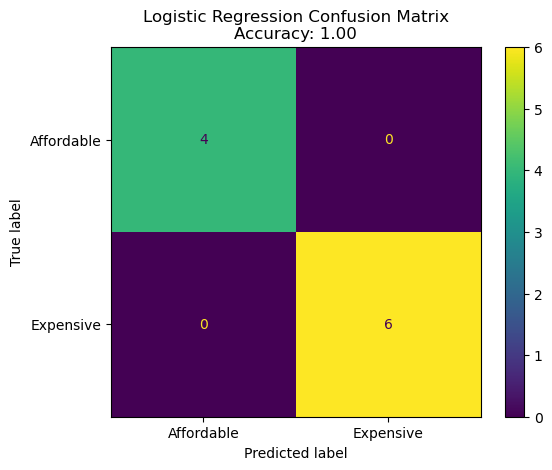

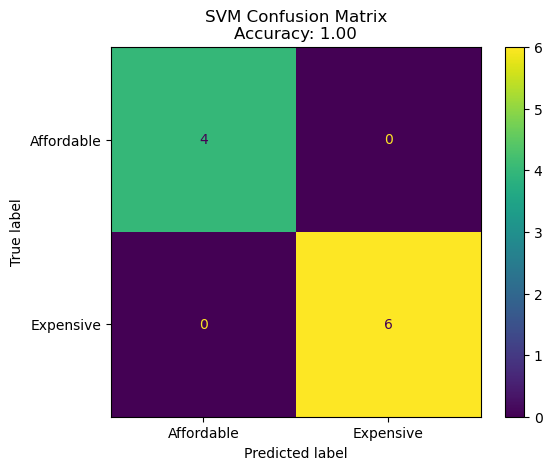

Hebbian Weights: [153.5    0.25]
Perceptron Weights: [17.51504756  0.67598129]
Perceptron Bias: 0.1833586577366787


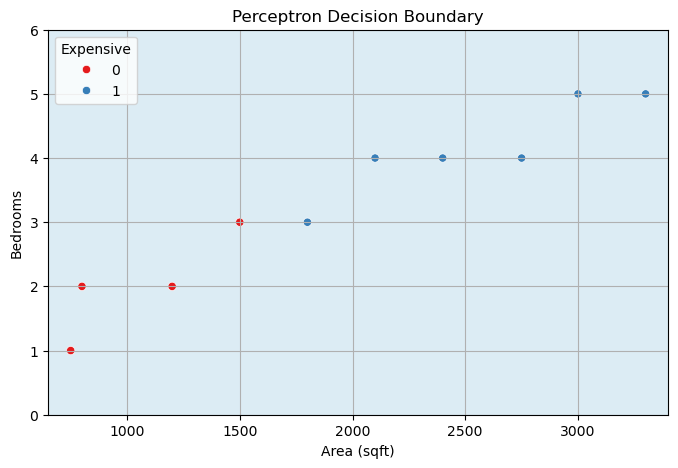

ANOVA F-statistic: 25.35198921105864
ANOVA P-value: 0.0016189412790898747


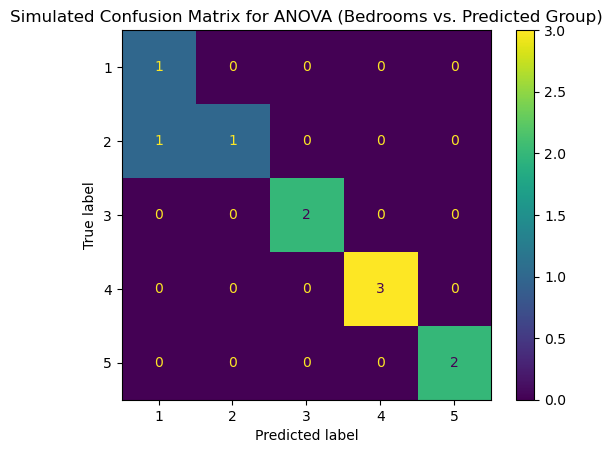

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import f_oneway

# 1. Dataset
df = pd.DataFrame({
    "Area_sqft": [750, 800, 1200, 1500, 1800, 2100, 2400, 2750, 3000, 3300],
    "Bedrooms": [1, 2, 2, 3, 3, 4, 4, 4, 5, 5],
    "Price": [150000, 165000, 240000, 300000, 330000, 360000, 390000, 430000, 470000, 500000],
})
df["Expensive"] = [1 if price > 300000 else 0 for price in df["Price"]]

X = df[["Area_sqft", "Bedrooms"]]
y_price = df["Price"]
y_class = df["Expensive"]

# 2. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y_price)
linear_pred = lin_reg.predict(X)

# Plot Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_price)), y_price, label="Actual Price", color='blue')
plt.plot(range(len(y_price)), linear_pred, label="Predicted Price", color='red')
plt.title("Linear Regression: Actual vs Predicted Price")
plt.xlabel("House Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# 3. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y_class)
log_pred = log_reg.predict(X)
cm_log = confusion_matrix(y_class, log_pred)
ConfusionMatrixDisplay(cm_log, display_labels=["Affordable", "Expensive"]).plot()
plt.title(f"Logistic Regression Confusion Matrix\nAccuracy: {accuracy_score(y_class, log_pred):.2f}")
plt.show()

# 4. SVM
svm = SVC()
svm.fit(X, y_class)
svm_pred = svm.predict(X)
cm_svm = confusion_matrix(y_class, svm_pred)
ConfusionMatrixDisplay(cm_svm, display_labels=["Affordable", "Expensive"]).plot()
plt.title(f"SVM Confusion Matrix\nAccuracy: {accuracy_score(y_class, svm_pred):.2f}")
plt.show()

# 5. Hebbian Learning
hebb_weights = np.zeros(2)
learning_rate = 0.01
for i in range(len(X)):
    xi = X.iloc[i].values
    target = y_class.iloc[i]
    hebb_weights += learning_rate * xi * target
print("Hebbian Weights:", hebb_weights)

# 6. Perceptron Learning
weights = np.random.rand(2)
bias = np.random.rand()
epochs = 10
for _ in range(epochs):
    for i in range(len(X)):
        xi = X.iloc[i].values
        target = y_class.iloc[i]
        output = 1 if np.dot(weights, xi) + bias >= 0 else 0
        error = target - output
        weights += learning_rate * error * xi
        bias += learning_rate * error
print("Perceptron Weights:", weights)
print("Perceptron Bias:", bias)

# Decision Boundary Plot (Perceptron)
x_min, x_max = X["Area_sqft"].min() - 100, X["Area_sqft"].max() + 100
y_min, y_max = X["Bedrooms"].min() - 1, X["Bedrooms"].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z >= 0, alpha=0.3, cmap="RdYlBu")
sns.scatterplot(x="Area_sqft", y="Bedrooms", hue="Expensive", data=df, palette="Set1")
plt.title("Perceptron Decision Boundary")
plt.xlabel("Area (sqft)")
plt.ylabel("Bedrooms")
plt.grid(True)
plt.show()

# 7. ANOVA Case Study
groups = [group["Price"].values for _, group in df.groupby("Bedrooms")]
f_val, p_val = f_oneway(*groups)
print("ANOVA F-statistic:", f_val)
print("ANOVA P-value:", p_val)

# Simulated Confusion Matrix for ANOVA-like grouping
df["Predicted_Bedrooms"] = df["Price"].apply(lambda price: min(df.groupby("Bedrooms")["Price"].mean().to_dict().items(), key=lambda x: abs(price - x[1]))[0])
cm_anova = confusion_matrix(df["Bedrooms"], df["Predicted_Bedrooms"])
ConfusionMatrixDisplay(cm_anova, display_labels=sorted(df["Bedrooms"].unique())).plot()
plt.title("Simulated Confusion Matrix for ANOVA (Bedrooms vs. Predicted Group)")
plt.show()
